In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# npz는 넘파일 배열이 2개 이상의 압축파일 가져올때는 딕셔너리처럼 키-값으로 가져오면 됨, 저장도 키-값으로 저장
data=np.load('clothes_data_size30.npz')
x_train,y_train,x_test,y_test=data['x_train'],data['y_train'],data['x_test'],data['y_test']
class_name=data['class_names']

![](2022-10-14-17-13-37.png)

In [5]:
np.shape(data)

(5,)

In [11]:
tmp = np.array(data)
tmp

array(['x_train', 'y_train', 'x_test', 'y_test', 'class_names'],
      dtype='<U11')

In [19]:
tmp['x_train']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [22]:
data['x_train']

array([[[[241, 236, 232],
         [241, 236, 232],
         [241, 236, 232],
         ...,
         [231, 226, 222],
         [229, 224, 220],
         [228, 223, 219]],

        [[241, 236, 232],
         [241, 236, 232],
         [241, 236, 232],
         ...,
         [231, 226, 222],
         [231, 226, 222],
         [230, 225, 221]],

        [[241, 236, 232],
         [241, 236, 232],
         [241, 236, 232],
         ...,
         [232, 227, 223],
         [231, 226, 222],
         [231, 226, 222]],

        ...,

        [[226, 221, 217],
         [226, 221, 217],
         [225, 220, 216],
         ...,
         [225, 220, 216],
         [222, 217, 213],
         [221, 216, 212]],

        [[224, 219, 215],
         [224, 219, 215],
         [222, 217, 213],
         ...,
         [222, 217, 213],
         [220, 215, 211],
         [219, 214, 210]],

        [[222, 217, 213],
         [221, 216, 212],
         [220, 215, 211],
         ...,
         [220, 215, 211],
        

In [23]:
data['x_train'].shape

(7969, 30, 30, 3)

In [24]:
type(data)

numpy.lib.npyio.NpzFile

In [25]:
type(data['x_train'])

numpy.ndarray

In [3]:
# 0~1(실수형)로 정규화해서 저장하려면 메모리 범위 벗어나서 0~255(정수형)으로 저장한거 가져옴
x_train.min(), x_train.max()

(0, 255)

In [4]:
# 정규화
xTrain=x_train/255
xTest=x_test/255

In [5]:
# 30px 30px 3채널 7969장
xTrain.shape

(7969, 30, 30, 3)

In [6]:
# 라벨 확인
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

[5011 6918 6404 3526 3797 7117 7621  771 6800]


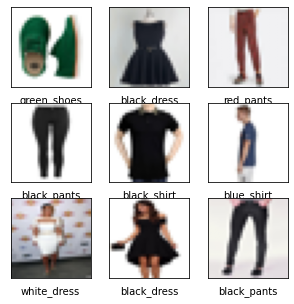

In [7]:
## 샘플 데이터 보기
import matplotlib.pyplot as plt
sample_size = 9
random_idx = np.random.randint(np.shape(xTrain)[0], size=sample_size) 
print(random_idx)

plt.figure(figsize = (5, 5))

for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xTrain[idx])
    plt.xlabel(class_name[int(y_train[idx])])
    
plt.show()

Epoch 1/30
250/250 [==============================] - 1s 3ms/step - loss: 2.1805 - accuracy: 0.3619 - val_loss: 1.7448 - val_accuracy: 0.4698
Epoch 2/30
250/250 [==============================] - 1s 3ms/step - loss: 1.5206 - accuracy: 0.5272 - val_loss: 1.4596 - val_accuracy: 0.5504
Epoch 3/30
250/250 [==============================] - 1s 3ms/step - loss: 1.2898 - accuracy: 0.5917 - val_loss: 1.3096 - val_accuracy: 0.5937
Epoch 4/30
250/250 [==============================] - 1s 3ms/step - loss: 1.1577 - accuracy: 0.6298 - val_loss: 1.3950 - val_accuracy: 0.5746
Epoch 5/30
250/250 [==============================] - 1s 3ms/step - loss: 1.1002 - accuracy: 0.6515 - val_loss: 1.1530 - val_accuracy: 0.6391
Epoch 6/30
250/250 [==============================] - 1s 3ms/step - loss: 0.9920 - accuracy: 0.6831 - val_loss: 1.1079 - val_accuracy: 0.6502
Epoch 7/30
250/250 [==============================] - 1s 3ms/step - loss: 0.9616 - accuracy: 0.6924 - val_loss: 1.1521 - val_accuracy: 0.6177
Epoch 

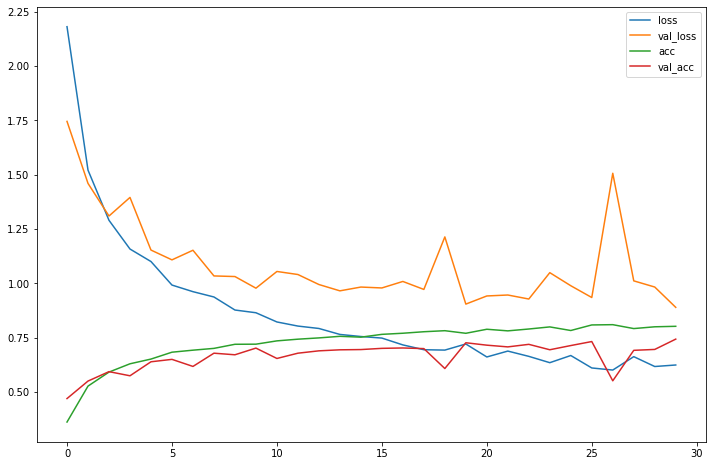

In [12]:
# 모델 생성
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(30, 30,3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(24, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 모델 학습
hist=model.fit(xTrain, y_train, validation_data=(xTest,y_test),epochs=30 )

# 히스토리 시각화
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()


Text(0.5, 1.0, 'brown_shoes')

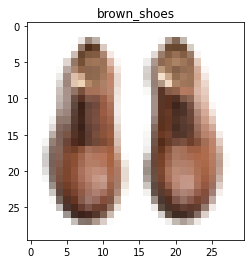

In [13]:
# 최종 y예측값임

num=3
pr=model.predict(xTest[num].reshape(1,30,30,3))

plt.imshow(xTest[num])
plt.title(class_name[np.argmax(pr)])

array([[4.8649040e-11, 1.5196836e-13, 8.2919626e-14, 1.0864652e-12,
        5.0978649e-13, 9.9999273e-01, 1.6871086e-08, 7.0180176e-06,
        2.7986050e-07, 4.4816296e-08, 4.8590489e-20, 3.3283852e-17,
        4.8464534e-23, 4.3706817e-22, 3.7528498e-27, 6.2256524e-23,
        2.9321827e-26, 4.6059510e-20, 1.3523373e-15, 1.7212721e-13,
        3.4877133e-20, 3.3077047e-16, 1.0953933e-13, 7.8588977e-14]],
      dtype=float32)

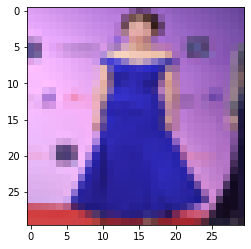

In [31]:
### 인터넷에 있는 이미지로 해봅니다.
from PIL import Image
img=Image.open('테스트_드레스.jpg')
img=img.resize((30,30))
imgArr=np.array(img)/255
plt.imshow(imgArr)
imgExpand=imgArr.reshape(1,30,30,3)
predict=model.predict(imgExpand)
predict


In [30]:
predict_num=np.argmax(predict)
predict_num, class_name[predict_num]

(5, 'blue_dress')